# Microsoft Stock Price Prediction with Machine Learning

In [1]:
from datetime import datetime
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np
import seaborn as sns

c:\Users\VIVOBBOK 16\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


In [2]:
microsoft = pd.read_csv('MicrosoftStock.csv', usecols=lambda col: col != 'index')
print(microsoft.head())

         date   open   high    low  close    volume  Name
0  2013-02-08  27.35  27.71  27.31  27.55  33318306  MSFT
1  2013-02-11  27.65  27.92  27.50  27.86  32247549  MSFT
2  2013-02-12  27.88  28.00  27.75  27.88  35990829  MSFT
3  2013-02-13  27.93  28.11  27.88  28.03  41715530  MSFT
4  2013-02-14  27.92  28.06  27.87  28.04  32663174  MSFT


In [3]:
microsoft.shape

(1259, 7)

In [4]:
microsoft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    1259 non-null   object 
 1   open    1259 non-null   float64
 2   high    1259 non-null   float64
 3   low     1259 non-null   float64
 4   close   1259 non-null   float64
 5   volume  1259 non-null   int64  
 6   Name    1259 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 69.0+ KB


In [5]:
microsoft.describe()

,open,high,low,close,volume
count,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03
mean,51.026394,51.436007,50.630397,51.063081,3.386946e+07
std,14.859387,14.930144,14.774630,14.852117,1.958979e+07
min,27.350000,27.600000,27.230000,27.370000,7.425603e+06
25%,40.305000,40.637500,39.870000,40.310000,2.254879e+07
50%,47.440000,47.810000,47.005000,47.520000,2.938758e+07
75%,59.955000,60.435000,59.275000,59.730000,3.842024e+07
max,95.140000,96.070000,93.720000,95.010000,2.483542e+08


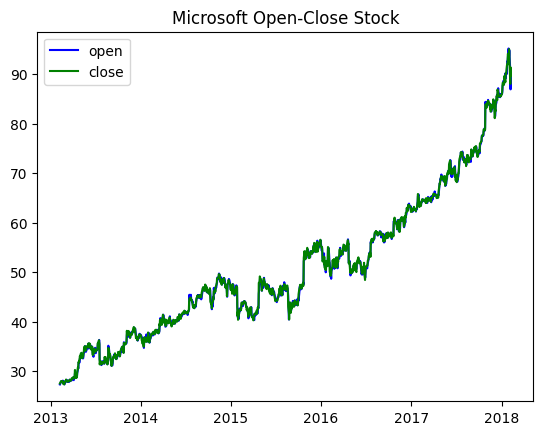

In [6]:
microsoft['date'] = pd.to_datetime(microsoft['date'])
plt.plot(microsoft['date'], 
		microsoft['open'], 
		color="blue", 
		label="open") 
plt.plot(microsoft['date'], 
		microsoft['close'], 
		color="green", 
		label="close") 
plt.title("Microsoft Open-Close Stock") 
plt.legend() 

# This code is modified by Susobhan Akhuli

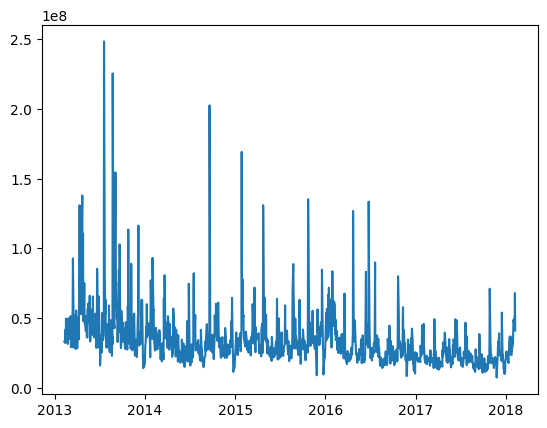

In [7]:
plt.plot(microsoft['date'],
         microsoft['volume'])
plt.show()

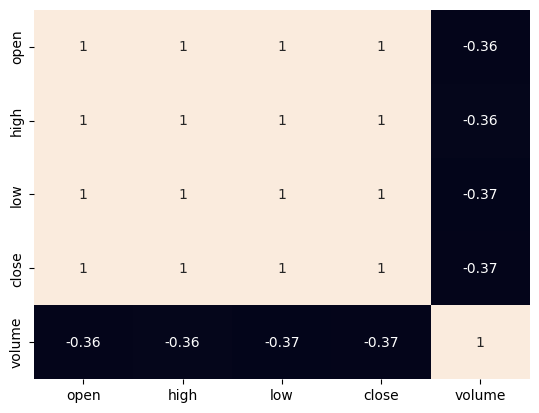

In [10]:
sns.heatmap(microsoft.select_dtypes(include=np.number).corr(), 
			annot=True, 
			cbar=False) 
plt.show() 


Text(0.5, 1.0, 'Microsoft Stock Prices')

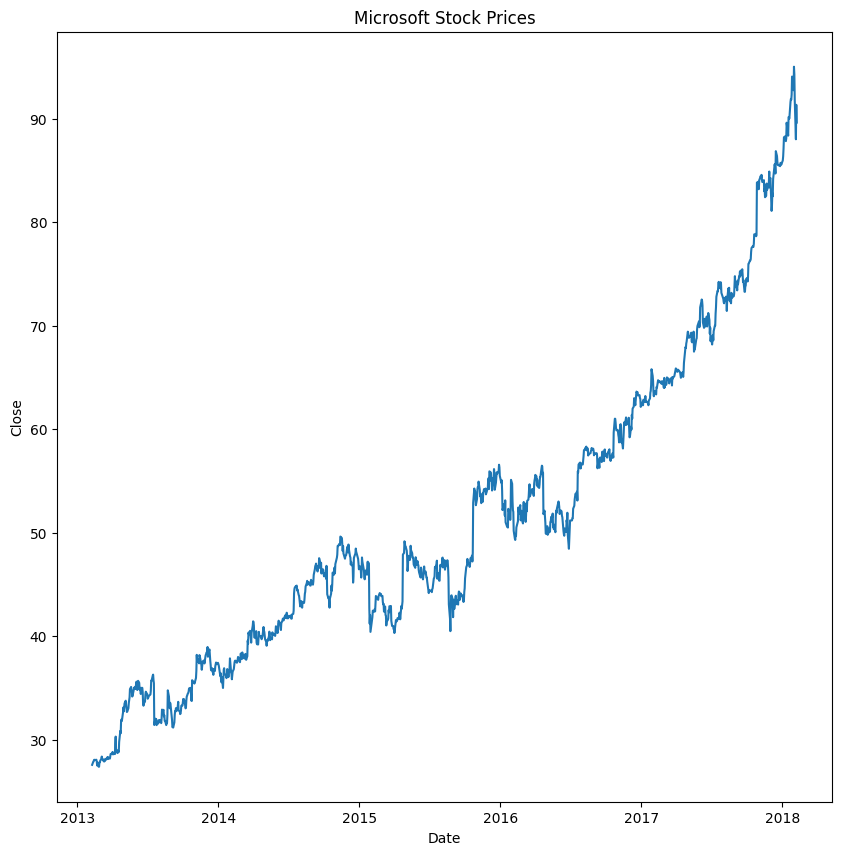

In [9]:
microsoft['date'] = pd.to_datetime(microsoft['date'])
prediction = microsoft.loc[(microsoft['date']
                            > datetime(2013, 1, 1))
                            & (microsoft['date']
                            < datetime(2018, 1, 1))]

plt.figure(figsize=(10, 10))
plt.plot(microsoft['date'], microsoft['close'])
plt.xlabel("Date")
plt.ylabel("Close")
plt.title("Microsoft Stock Prices")

In [12]:
# prepare the training set samples 
msft_close = microsoft.filter(['close']) 
dataset = msft_close.values 
training = int(np.ceil(len(dataset) * .95)) 

# scale the data 
ss = StandardScaler() 
ss = ss.fit_transform(dataset) 

train_data = ss[0:int(training), :] 

x_train = [] 
y_train = [] 

# considering 60 as the batch size, 
# create the X_train and y_train 
for i in range(60, len(train_data)): 
	x_train.append(train_data[i-60:i, 0]) 
	y_train.append(train_data[i, 0]) 

x_train, y_train = np.array(x_train), np.array(y_train) 
X_train = np.reshape(x_train, 
					(x_train.shape[0], 
					x_train.shape[1], 1)) 

In [13]:
model = keras.models.Sequential()
model.add(keras.layers.LSTM(units=64,
                            return_sequences=True,
                            input_shape
                            =(X_train.shape[1], 1)))
model.add(keras.layers.LSTM(units=64))
model.add(keras.layers.Dense(128))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(1))

print(model.summary())

c:\Users\VIVOBBOK 16\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 60, 64)         │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 58,369 (228.00 KB)

 Trainable params: 58,369 (228.00 KB)

 Non-trainable params: 0 (0.00 B)

None


In [14]:
from keras.metrics import RootMeanSquaredError 
model.compile(optimizer='adam', 
            loss='mae', 
            metrics=[RootMeanSquaredError()]) 

history = model.fit(X_train, y_train, 
					epochs=20) 


Epoch 1/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.1901 - root_mean_squared_error: 0.2962
Epoch 2/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.1038 - root_mean_squared_error: 0.1397
Epoch 3/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0952 - root_mean_squared_error: 0.1277
Epoch 4/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.1006 - root_mean_squared_error: 0.1389
Epoch 5/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0946 - root_mean_squared_error: 0.1255
Epoch 6/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0888 - root_mean_squared_error: 0.1176
Epoch 7/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0867 - root_mean_squared_error: 0.1163
Epoch 8/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0855 - root_mean_squared_error: 0.1123
Epoch 9/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0799 - root_mean_squared_error: 0.1076
Epoch 10/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0838 - root_mean_squared_error: 0.1137

In [15]:
testing = ss[training - 60:, :]
x_test = []
y_test = dataset[training:, :]
for i in range(60, len(testing)):
    x_test.append(testing[i-60:i, 0])

x_test = np.array(x_test)
X_test = np.reshape(x_test,
                    (x_test.shape[0],
                     x_test.shape[1], 1))

pred = model.predict(X_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


C:\Users\VIVOBBOK 16\AppData\Local\Temp\ipykernel_27992\838853255.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = pred


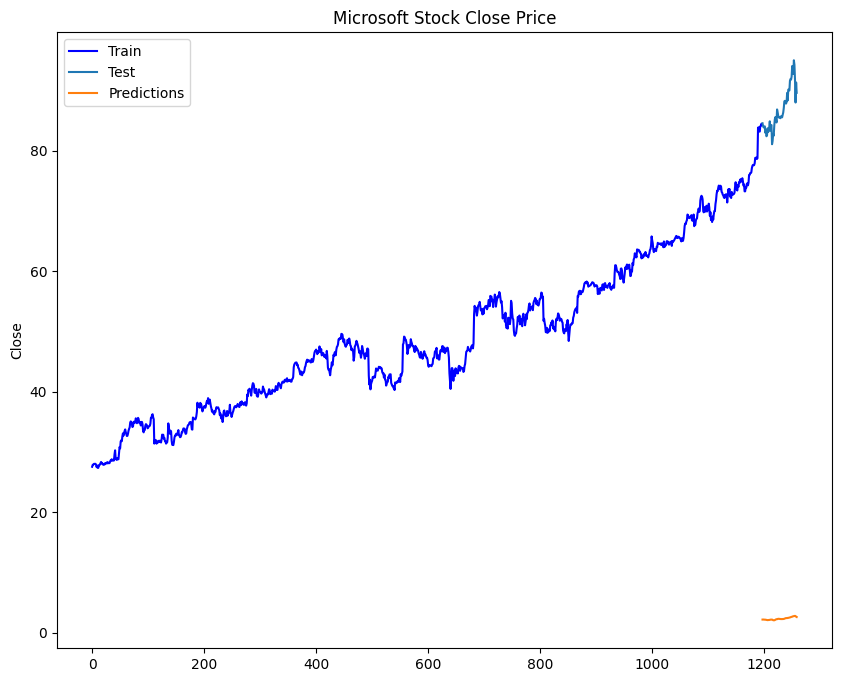

In [16]:
train = microsoft[:training]
test = microsoft[training:]
test['Predictions'] = pred

plt.figure(figsize=(10, 8))
plt.plot(train['close'], c="b")
plt.plot(test[['close', 'Predictions']])
plt.title('Microsoft Stock Close Price')
plt.ylabel("Close")
plt.legend(['Train', 'Test', 'Predictions'])